In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

In [235]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')

In [182]:
train.sample(7)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
46453,46454,0,0.05,68,0,52.00,NaN,4,0,0,0,0.00
62811,62812,0,0.90,29,1,0.17,2000.00,7,1,0,0,0.00
98229,98230,0,0.36,43,0,0.39,6500.00,8,0,2,0,1.00
117906,117907,0,0.01,79,0,0.07,1767.00,9,0,0,0,0.00
3758,3759,0,0.16,62,0,0.41,7400.00,21,0,1,0,0.00
94603,94604,0,0.00,62,0,0.00,5644.00,1,0,0,0,0.00
80845,80846,0,0.03,66,0,0.01,11322.00,8,0,0,0,0.00


In [72]:
test.sample(7)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64373,64374,NaN,0.464102,40,0,0.285648,15000.0,12,0,1,0,3.0
63496,63497,NaN,0.940402,30,1,0.584286,2010.0,10,0,0,0,3.0
31764,31765,NaN,0.251479,44,1,0.726366,7721.0,17,0,4,0,2.0
19429,19430,NaN,0.233392,32,0,0.360440,6000.0,8,0,1,0,2.0
53945,53946,NaN,0.140698,42,0,0.233721,3700.0,7,0,1,0,2.0
50186,50187,NaN,0.171104,50,0,0.482393,21666.0,12,0,2,0,3.0
21462,21463,NaN,0.466003,57,1,0.239280,4500.0,5,0,1,0,1.0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [76]:
train.shape

(150000, 12)

In [77]:
test.shape

(101503, 12)

In [236]:
pd.set_option("display.float_format","{:.2f}".format)

In [237]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [238]:
print(train.duplicated().sum())

0


In [239]:
train.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [172]:
train.MonthlyIncome.unique()

array([ 9120.,  2600.,  3042., ..., 15648.,   521.,  7647.],
      shape=(13595,))

In [240]:
MonthlyIncome_imputer = SimpleImputer(strategy='median')
train['MonthlyIncome'] = MonthlyIncome_imputer.fit_transform(train[['MonthlyIncome']])

In [241]:
train.isna().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

In [242]:
train["NumberOfDependents"] = train["NumberOfDependents"].fillna(train["NumberOfDependents"].median())

In [243]:
train.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [244]:
train.age.unique()

array([ 45,  40,  38,  30,  49,  74,  57,  39,  27,  51,  46,  76,  64,
        78,  53,  43,  25,  32,  58,  50,  69,  24,  28,  62,  42,  75,
        26,  52,  41,  81,  31,  68,  70,  73,  29,  55,  35,  72,  60,
        67,  36,  56,  37,  66,  83,  34,  44,  48,  61,  80,  47,  59,
        77,  63,  54,  33,  79,  65,  86,  92,  23,  87,  71,  22,  90,
        97,  84,  82,  91,  89,  85,  88,  21,  93,  96,  99,  94,  95,
       101,  98, 103, 102, 107, 105,   0, 109])

In [245]:
train[train["age"] == 0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.00,0,1,0.44,6000.00,6,0,2,0,2.00


In [246]:
train[train["age"] == 0].shape

(1, 12)

In [247]:
train.loc[train["age"] == 0, "age"] = train["age"].median()

In [248]:
(train["age"] == 0).sum()

np.int64(0)

In [ ]:
train[train["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98, 99])]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [ ]:
train[train["NumberOfTimes90DaysLate"].isin([96, 98, 99])]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [ ]:
train[train["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98, 99])]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [252]:
cols = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberOfTime60-89DaysPastDueNotWorse"
]

In [255]:
imputer = SimpleImputer(strategy="most_frequent")
train[cols] = imputer.fit_transform(train[cols])

In [259]:
train["RevolvingUtilizationOfUnsecuredLines"].describe()

count   150000.00
mean         6.05
std        249.76
min          0.00
25%          0.03
50%          0.15
75%          0.56
max      50708.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

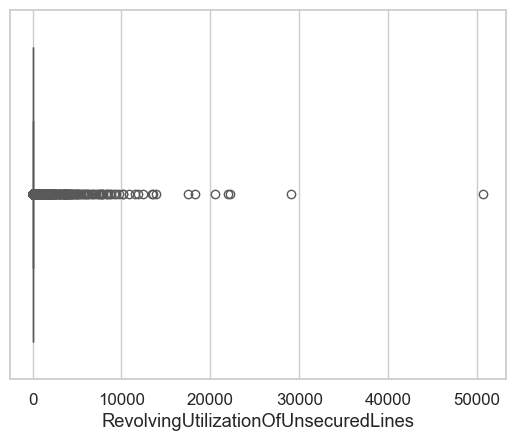

In [260]:
sns.boxplot(x=train["RevolvingUtilizationOfUnsecuredLines"])
plt.show()

In [261]:
train["RevolvingUtilizationOfUnsecuredLines"] = \
train["RevolvingUtilizationOfUnsecuredLines"].clip(upper=2)

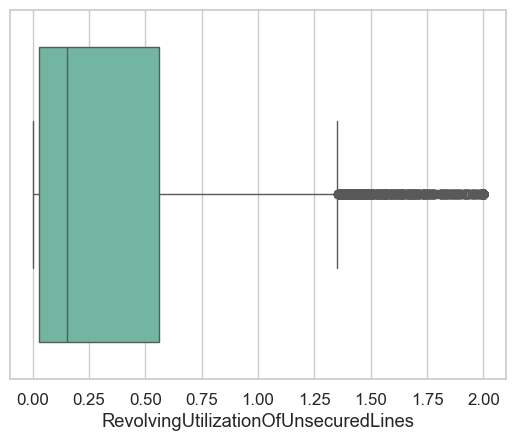

In [262]:
sns.boxplot(x=train["RevolvingUtilizationOfUnsecuredLines"])
plt.show()

In [263]:
train["DebtRatio"].describe()

count   150000.00
mean       353.01
std       2037.82
min          0.00
25%          0.18
50%          0.37
75%          0.87
max     329664.00
Name: DebtRatio, dtype: float64

In [ ]:
threshold = 10

train["DebtRatio_Is_Absolute"] = (
    train["DebtRatio"] > threshold
).astype(int)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_Is_Absolute
0,1,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00,0
1,2,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00,0
2,3,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00,0
3,4,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00,0
4,5,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.04,74,0,0.23,2100.00,4,0,1,0,0.00,0
149996,149997,0,0.30,44,0,0.72,5584.00,4,0,1,0,2.00,0
149997,149998,0,0.25,58,0,3870.00,5400.00,18,0,1,0,0.00,1
149998,149999,0,0.00,30,0,0.00,5716.00,4,0,0,0,0.00,0


In [268]:
train["DebtRatio"] = train["DebtRatio"].clip(upper=threshold)

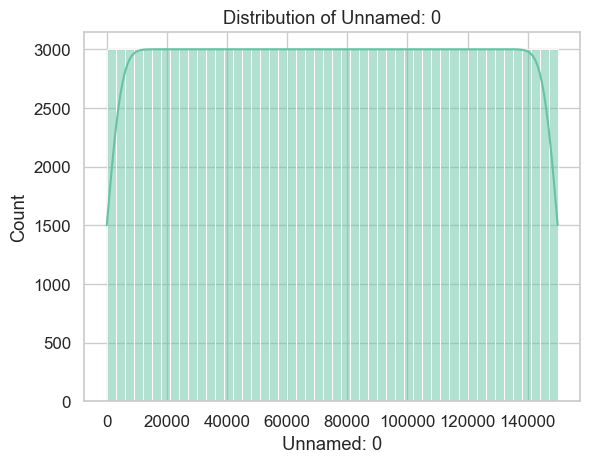

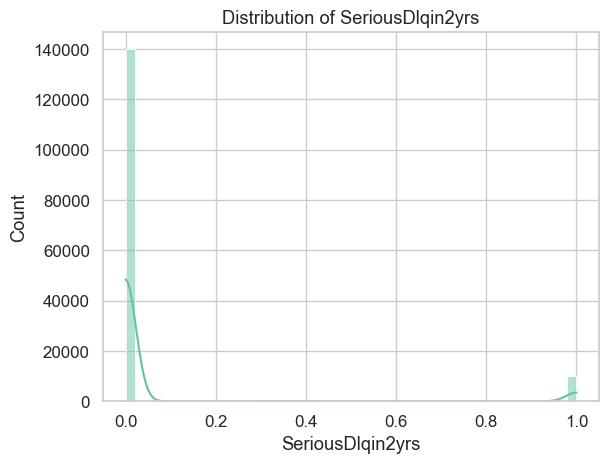

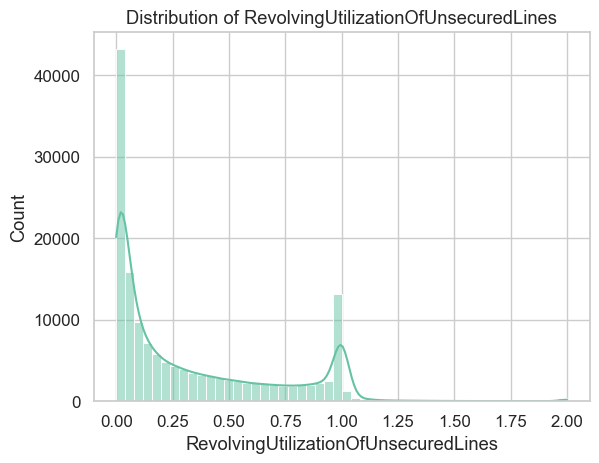

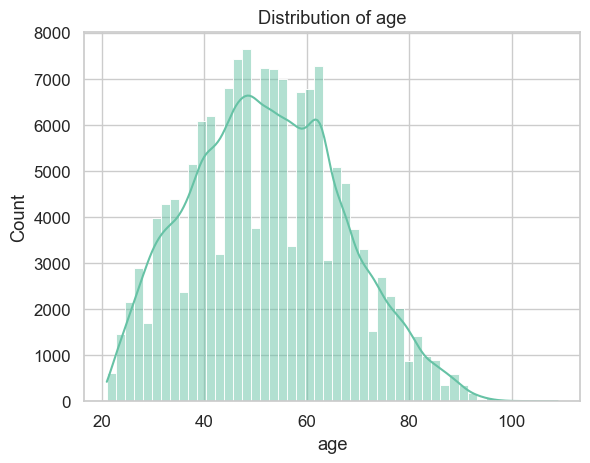

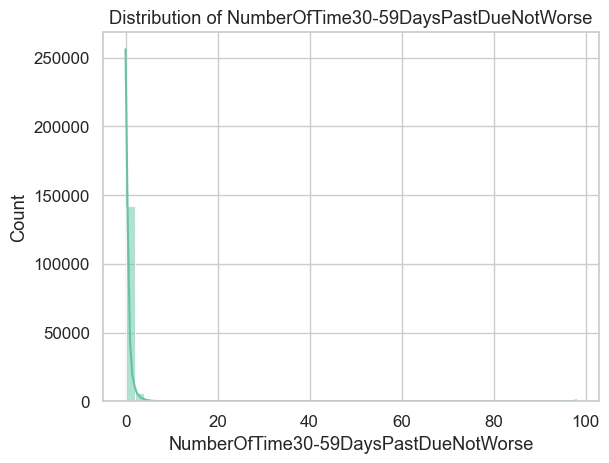

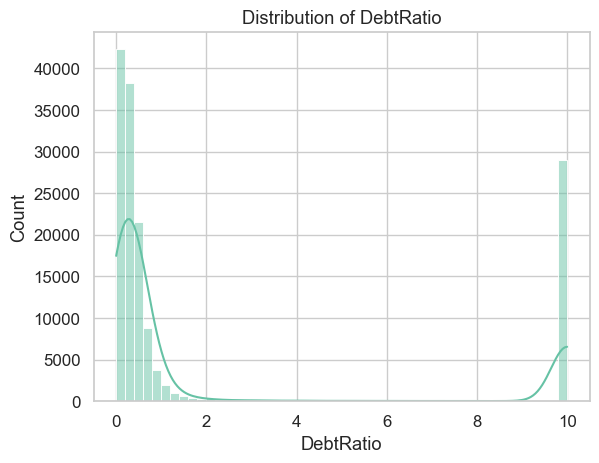

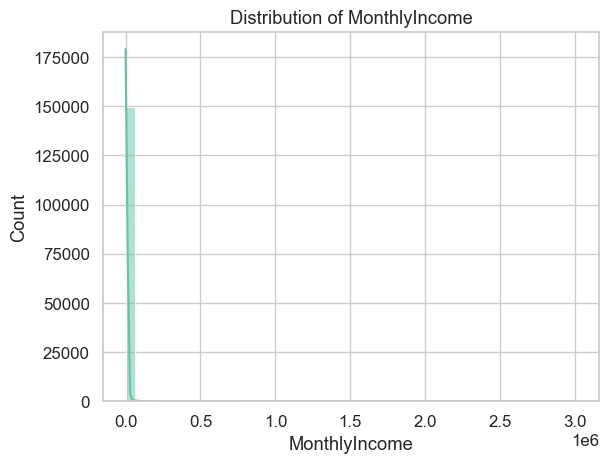

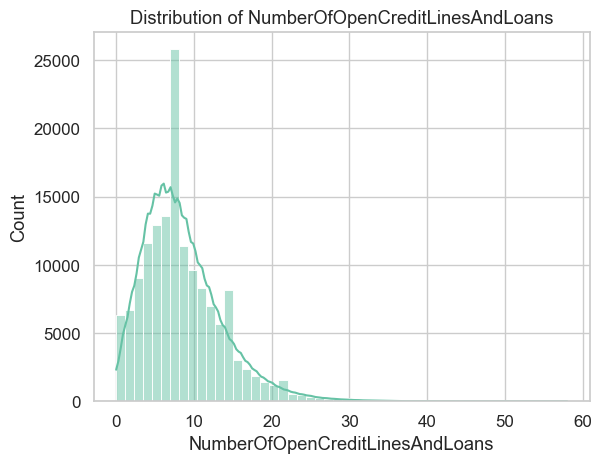

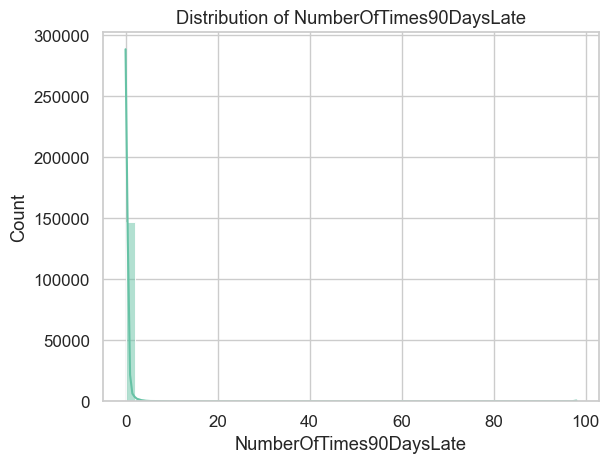

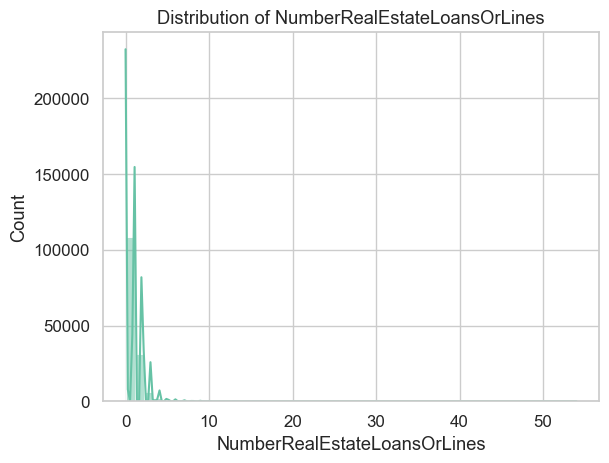

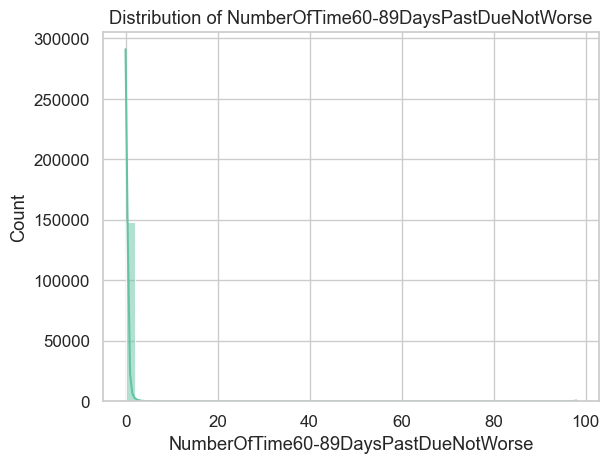

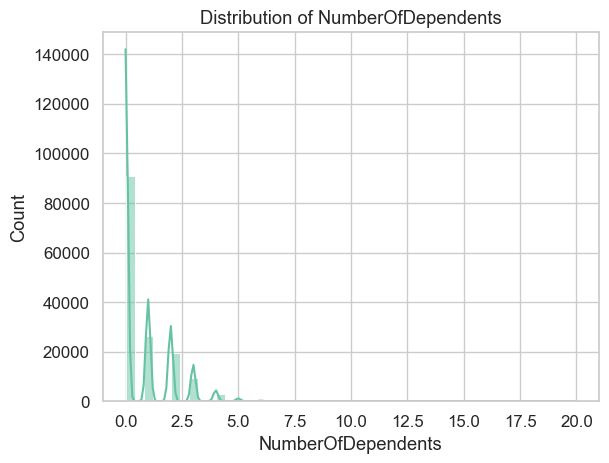

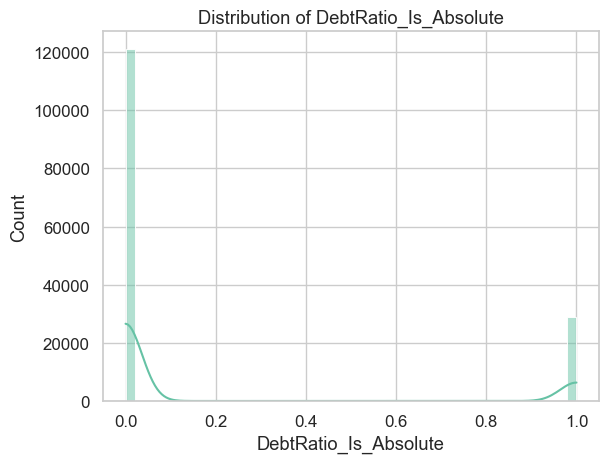

In [269]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure()
    sns.histplot(train[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [276]:
train["MonthlyIncome_log"] = np.log1p(train["MonthlyIncome"])

In [278]:
train["DebtRatio_log"] = np.log1p(train["DebtRatio"])

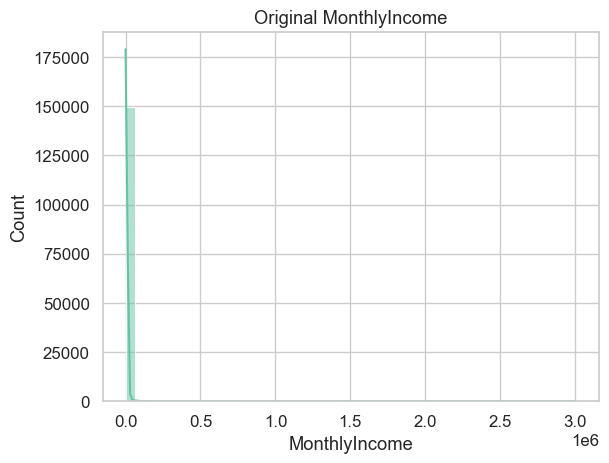

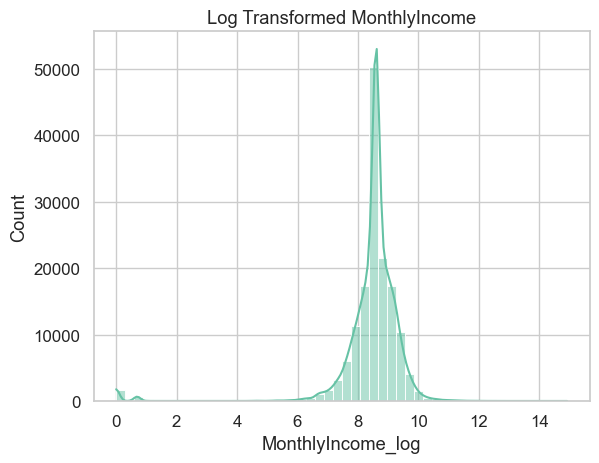

In [279]:
plt.figure()
sns.histplot(train["MonthlyIncome"], bins=50, kde=True)
plt.title("Original MonthlyIncome")
plt.show()

plt.figure()
sns.histplot(train["MonthlyIncome_log"], bins=50, kde=True)
plt.title("Log Transformed MonthlyIncome")
plt.show()

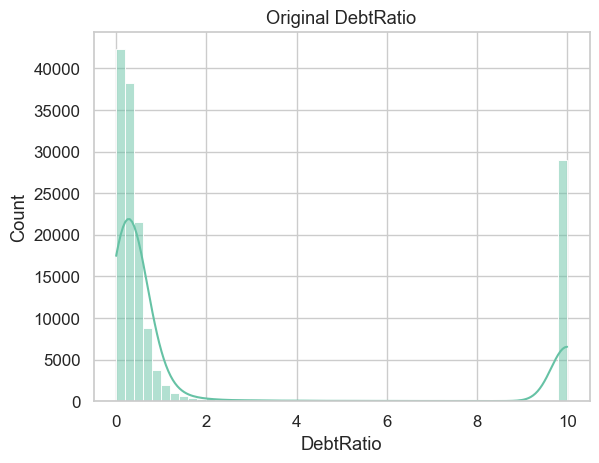

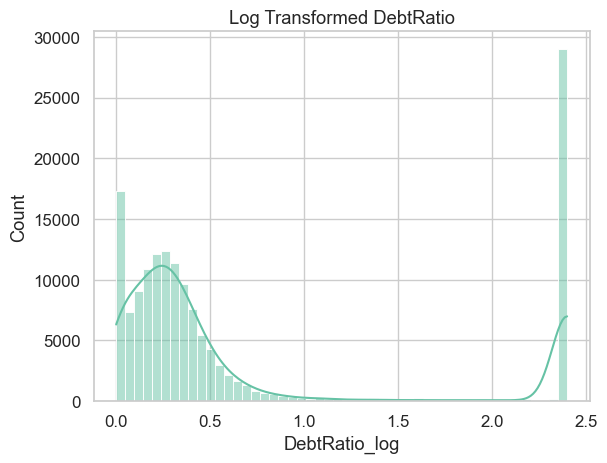

In [280]:
plt.figure()
sns.histplot(train["DebtRatio"], bins=50, kde=True)
plt.title("Original DebtRatio")
plt.show()

plt.figure()
sns.histplot(train["DebtRatio_log"], bins=50, kde=True)
plt.title("Log Transformed DebtRatio")
plt.show()

In [281]:
train["SeriousDlqin2yrs"].value_counts(normalize=True)

SeriousDlqin2yrs
0   0.93
1   0.07
Name: proportion, dtype: float64

In [282]:
default_rate = (
    train.groupby("NumberOfTimes90DaysLate")["SeriousDlqin2yrs"]
    .mean()
    .reset_index()
)

default_rate.head()

,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0,0,0.05
1,1,0.34
2,2,0.50
3,3,0.58
4,4,0.67


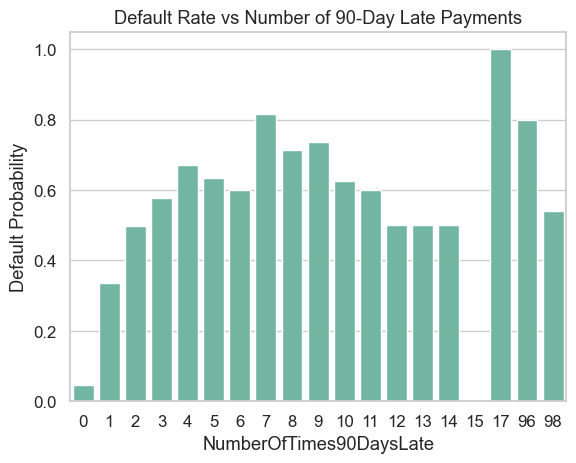

In [283]:
plt.figure()
sns.barplot(
    data=default_rate,
    x="NumberOfTimes90DaysLate",
    y="SeriousDlqin2yrs"
)
plt.title("Default Rate vs Number of 90-Day Late Payments")
plt.ylabel("Default Probability")
plt.show()

In [284]:
count_features = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse"
]

for feature in count_features:
    print(f"\nDefault Rate by {feature}")
    print(train.groupby(feature)["SeriousDlqin2yrs"].mean())


Default Rate by NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse
0    0.04
1    0.15
2    0.27
3    0.35
4    0.43
5    0.45
6    0.53
7    0.52
8    0.32
9    0.33
10   0.75
11   1.00
12   0.50
13   1.00
96   0.80
98   0.54
Name: SeriousDlqin2yrs, dtype: float64

Default Rate by NumberOfTime60-89DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
0    0.05
1    0.31
2    0.50
3    0.57
4    0.62
5    0.62
6    0.75
7    0.56
8    0.50
9    0.00
11   1.00
96   0.80
98   0.54
Name: SeriousDlqin2yrs, dtype: float64


In [285]:
continuous_features = [
    "DebtRatio",
    "RevolvingUtilizationOfUnsecuredLines",
    "MonthlyIncome"
]

for feature in continuous_features:
    train[f"{feature}_Bin"] = pd.qcut(train[feature], q=5, duplicates="drop")
    print(f"\nDefault Rate by {feature} (Binned)")
    print(train.groupby(f"{feature}_Bin")["SeriousDlqin2yrs"].mean())


Default Rate by DebtRatio (Binned)
DebtRatio_Bin
(-0.001, 0.134]   0.06
(0.134, 0.287]    0.06
(0.287, 0.468]    0.06
(0.468, 4.0]      0.10
(4.0, 10.0]       0.06
Name: SeriousDlqin2yrs, dtype: float64

Default Rate by RevolvingUtilizationOfUnsecuredLines (Binned)
RevolvingUtilizationOfUnsecuredLines_Bin
(-0.001, 0.0192]   0.02
(0.0192, 0.0832]   0.02
(0.0832, 0.271]    0.03
(0.271, 0.699]     0.07
(0.699, 2.0]       0.20
Name: SeriousDlqin2yrs, dtype: float64

Default Rate by MonthlyIncome (Binned)
MonthlyIncome_Bin
(-0.001, 3400.0]      0.09
(3400.0, 5400.0]      0.07
(5400.0, 8250.0]      0.06
(8250.0, 3008750.0]   0.05
Name: SeriousDlqin2yrs, dtype: float64


C:\Users\oarju\AppData\Local\Temp\ipykernel_14488\1179844853.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(f"{feature}_Bin")["SeriousDlqin2yrs"].mean())
C:\Users\oarju\AppData\Local\Temp\ipykernel_14488\1179844853.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(f"{feature}_Bin")["SeriousDlqin2yrs"].mean())
C:\Users\oarju\AppData\Local\Temp\ipykernel_14488\1179844853.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

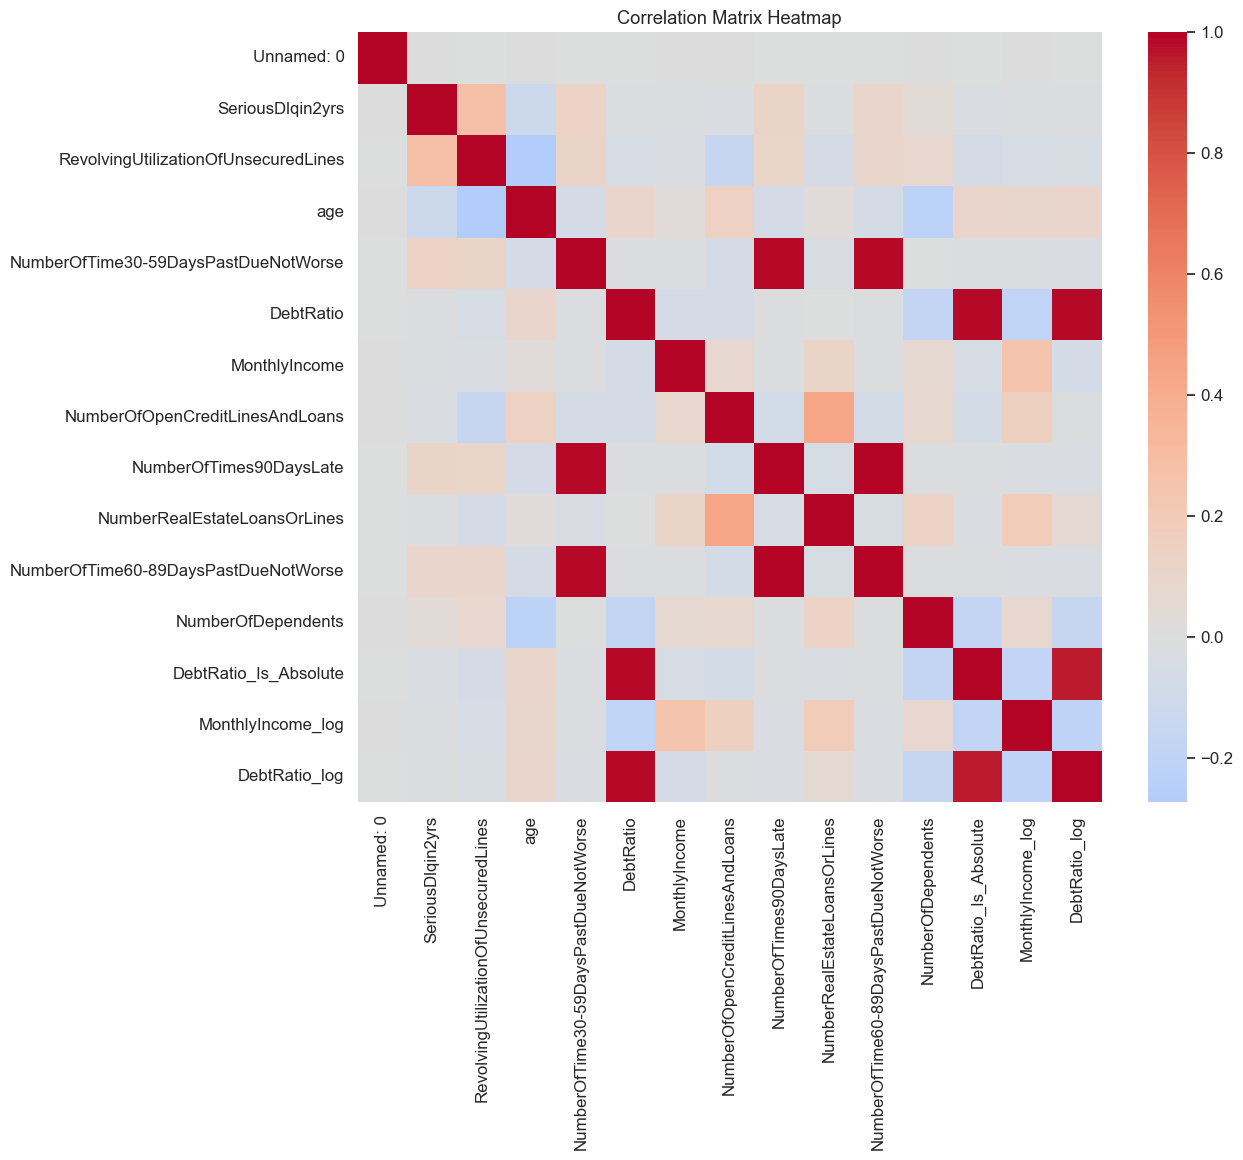

In [288]:
corr_matrix = train.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(12,10))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [289]:
train["Total_Past_Due"] = (
    train["NumberOfTime30-59DaysPastDueNotWorse"] +
    train["NumberOfTime60-89DaysPastDueNotWorse"] +
    train["NumberOfTimes90DaysLate"]
)

In [290]:
train["Income_Per_Dependent"] = (
    train["MonthlyIncome"] / (train["NumberOfDependents"] + 1)
)

In [291]:
train["Monthly_Debt_Absolute"] = (
    train["DebtRatio"] * train["MonthlyIncome"]
)

In [292]:
train["SeriousDlqin2yrs"].value_counts(normalize=True)

SeriousDlqin2yrs
0   0.93
1   0.07
Name: proportion, dtype: float64

In [300]:
cols_to_drop = [
    "SeriousDlqin2yrs", 
    "DebtRatio_Bin", 
    "RevolvingUtilizationOfUnsecuredLines_Bin", 
    "MonthlyIncome_Bin",
    "Unnamed: 0"
]

X = train.drop(columns=cols_to_drop)
y = train["SeriousDlqin2yrs"]

In [ ]:
X = train.drop("SeriousDlqin2yrs", axis=1)
y = train["SeriousDlqin2yrs"]

In [302]:
test = pd.read_csv("cs-test.csv")

In [ ]:
test['MonthlyIncome'] = MonthlyIncome_imputer.transform(test[['MonthlyIncome']])
test['NumberOfDependents'] = test['NumberOfDependents'].fillna(train['NumberOfDependents'].median())

test.loc[test["age"] == 0, "age"] = train["age"].median()

test[cols] = imputer.transform(test[cols])

test["RevolvingUtilizationOfUnsecuredLines"] = test["RevolvingUtilizationOfUnsecuredLines"].clip(upper=2)
test["DebtRatio_Is_Absolute"] = (test["DebtRatio"] > threshold).astype(int)
test["DebtRatio"] = test["DebtRatio"].clip(upper=threshold)

In [304]:

for df in [test]:
    df['Total_Past_Due'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] + 
                            df['NumberOfTime60-89DaysPastDueNotWorse'] + 
                            df['NumberOfTimes90DaysLate'])
    
    df['Income_Per_Dependent'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)

In [ ]:
test['DebtRatio_log'] = np.log1p(test['DebtRatio'])
test['MonthlyIncome_log'] = np.log1p(test['MonthlyIncome'])
test['Monthly_Debt_Absolute'] = test['DebtRatio'] * test['MonthlyIncome']

test['Total_Past_Due'] = (test['NumberOfTime30-59DaysPastDueNotWorse'] + 
                          test['NumberOfTime60-89DaysPastDueNotWorse'] + 
                          test['NumberOfTimes90DaysLate'])
test['Income_Per_Dependent'] = test['MonthlyIncome'] / (test['NumberOfDependents'] + 1)

features = [c for c in train.columns if c not in ['Unnamed: 0', 'Id', 'SeriousDlqin2yrs']]

In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Import Models (Removed XGBoost and LightGBM, added HistGradientBoosting)
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Define Features (Ensure ID and Target are excluded)
features = [c for c in test.columns if c not in ['Unnamed: 0', 'Id', 'SeriousDlqin2yrs']]

# (Uncommented these so the split works)
# X = train[features]
# y = train['SeriousDlqin2yrs']
X_test = test[features]
X_test = X_test[X.columns]

# 2. Train/Validation Split (80% Train, 20% Validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Preprocessing for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test) # Scale test data strictly for Logistic Regression

# Dictionaries to store results and trained models
results = {}
models = {}

# --- Model 1: Random Forest ---
print("Training Random Forest...")
rf = RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
results['Random Forest'] = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])

# --- Model 2: Logistic Regression ---
print("Training Logistic Regression...")
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr
results['Logistic Regression'] = roc_auc_score(y_val, lr.predict_proba(X_val_scaled)[:, 1])

# --- Model 3: HistGradientBoosting ---
print("Training HistGradientBoosting...")
hgb = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)
hgb.fit(X_train, y_train)
models['HistGradientBoosting'] = hgb
results['HistGradientBoosting'] = roc_auc_score(y_val, hgb.predict_proba(X_val)[:, 1])

# 4. Evaluate and Find the Best Model
print("\n" + "="*30)
print("--- Validation ROC AUC Scores ---")
best_model_name = None
best_score = 0

for name, auc in results.items():
    print(f"{name}: {auc:.4f}")
    if auc > best_score:
        best_score = auc
        best_model_name = name

print("="*30)
print(f"The Best Model is: {best_model_name} with an AUC of {best_score:.4f}")

# 5. Final Prediction with the Best Model
best_model = models[best_model_name]
print(f"\nGenerating final test predictions using {best_model_name}...")

# Conditionally use the scaled data ONLY if Logistic Regression won
if best_model_name == 'Logistic Regression':
    test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    test_predictions = best_model.predict_proba(X_test)[:, 1]

# 6. Save the Output
# Dynamically catch whether your test set's ID column is 'Id' or 'Unnamed: 0'
id_col = 'Unnamed: 0' if 'Unnamed: 0' in test.columns else 'Id'

submission = pd.DataFrame({
    'Id': test[id_col],
    'Probability': test_predictions
})

submission.to_csv('submission_best_model.csv', index=False)
print("Project Complete! Predictions saved to 'submission_best_model.csv'")

Training Random Forest...
Training Logistic Regression...
Training HistGradientBoosting...

--- Validation ROC AUC Scores ---
Random Forest: 0.8638
Logistic Regression: 0.8343
HistGradientBoosting: 0.8693
The Best Model is: HistGradientBoosting with an AUC of 0.8693

Generating final test predictions using HistGradientBoosting...
Project Complete! Predictions saved to 'submission_best_model.csv'
